# Descriptores de Color y Textura - Distancia de histograma

En este tutorial recapitularemos brevemente cómo obtener el histograma de color conjunto y concatenado de una imagen. Posteriormente, veremos como implementar las diferentes distancias de histogramas. Por ultimo, se presentará una implementación para obtener el descriptor basado en textura de histograma de Patrones Locales Binarios (LBP por sus siglas en inglés).

## Descriptores de Color

En tutoriales pasados se estudió cómo construir los histogramas conjuntos y concatenados de intensidades de color de una imagen para distintos espacios de color. En un contexto de clasificación, podemos pensar estos histogramas como un descriptor de la imagen en un espacio de representación de $N$ dimensiones, donde $N$ es la cantidad de *bins* del histograma. En otras palabras, a través del histograma podemos representar una imagen como un punto en un espacio de $N$ dimensiones.

A continuación, se presentarán dos funciones que permiten obtener el vector asociado a los histogramas conjuntos y concatenados de una imagen a color. Estas funciones son adaptaciones de las presentadas en los tutoriales anteriores, de tal forma que cada una retorna un vector fila asociado al histograma de la imagen recibida por parámetro:

In [1]:
import numpy as np

def concatenated_histogram(image, bins_per_channel):
    concat_hist = []
    # Para cada canal
    for c in range(image.shape[2]):
        # Se obtiene su histograma
        # El parámetro range se usa para que todos los bins se encuentren distribuidos uniformemente en todo
        # el rango dinámico de cada canal RGB. El parámetro density se usa para obtener el histograma normalizado
        ch_hist, _ = np.histogram(image[:,:,c].flatten(), bins=bins_per_channel)
        
        # Se agrega el histograma del canal a la lista de histogramas de todos los canales
        concat_hist.append(ch_hist)
        
    # Concatenamos los histogramas en un solo arreglo de numpy y le damos forma de un vector fila
    concat_hist = np.concatenate(concat_hist).reshape(1, -1)
    
    return concat_hist/np.sum(concat_hist)

def joint_histogram(image, bins_per_channel):
    
    # Las intensidades de la imagen de dimensiones (m, n, 3) se reordenan en una matriz de dimensiones (3, m x n)
    # para satisfacer los requerimientos de la función histogramdd de numpy
    intensities = np.stack([image[:, :, 0].flatten(), 
                           image[:, :, 1].flatten(),
                           image[:, :, 2].flatten()], axis=1)
    
    # Se obtiene el histograma conjunto y la intersección de rangos asociada a cada bin
    joint_hist, _ = np.histogramdd(intensities, bins = bins_per_channel, range=[(0, 255), (0, 255), (0, 255)], density=True)
    
    # Convertimos el histograma conjunto de dimensiones (bins_per_channel, bins_per_channel, bins_per_channel)
    # en un vector fila de dimensiones (1, bins_per_channel^3)
    
    joint_hist = joint_hist.flatten().reshape(1, -1)
    
    joint_hist=joint_hist/np.sum(joint_hist)
    
    return joint_hist


En el siguiente fragmento de código obtenemos el histograma conjunto y concatenado de una imagen ejemplo, y obtenemos las dimensiones de los histogramas obtenidos:

C:\Users\eduar\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Dimensiones de la imagen
(300, 454, 3)
Cantidad de bins por canal:
10
Dimensiones del histograma concatenado
(1, 30)
Dimensiones del histograma conjunto
(1, 1000)


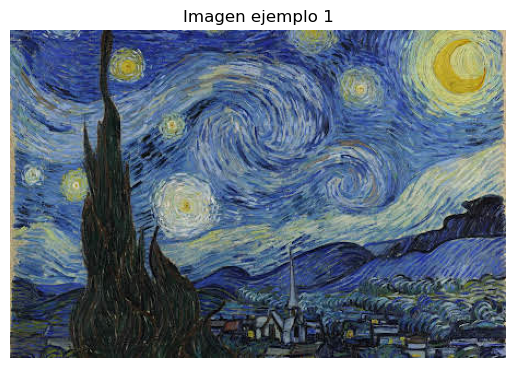

In [2]:
from skimage.io import imread
import matplotlib.pyplot as plt

example_1 = imread("starry_night.jpg")
plt.figure()
plt.title("Imagen ejemplo 1")
plt.imshow(example_1)
plt.axis("Off")

print("Dimensiones de la imagen")
print(example_1.shape)

print("Cantidad de bins por canal:")
n = 10
print(n)

print("Dimensiones del histograma concatenado")
con_hist_1 = concatenated_histogram(example_1, 10)
print(con_hist_1.shape)

print("Dimensiones del histograma conjunto")
joint_hist_1 = joint_histogram(example_1, 10)
print(joint_hist_1.shape)

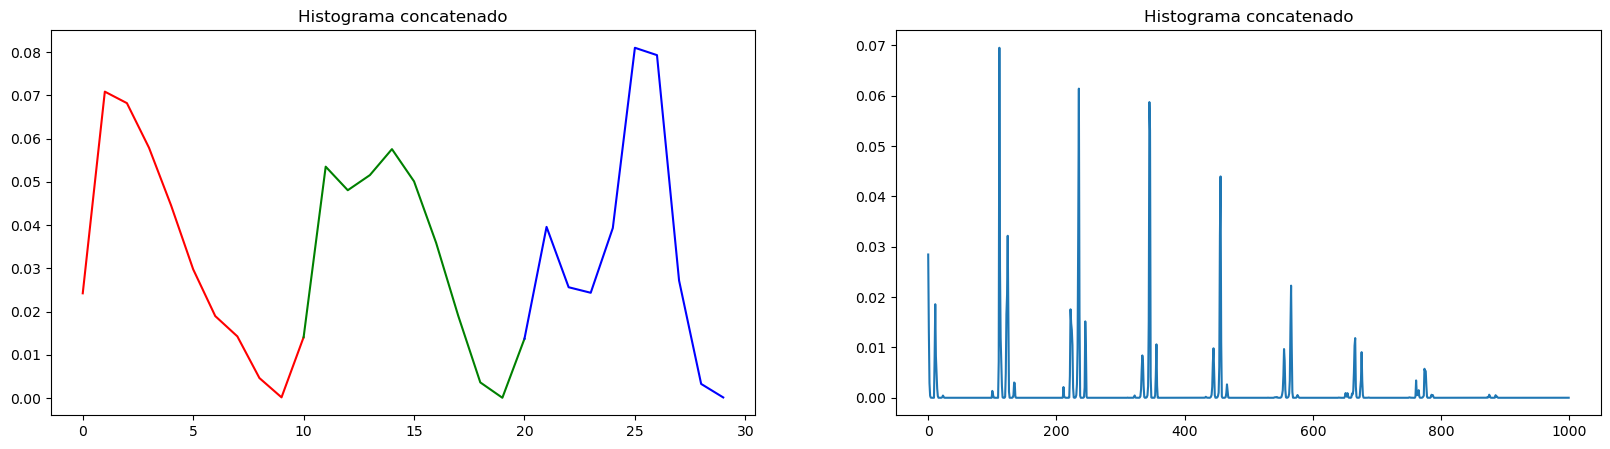

In [3]:
fig,ax=plt.subplots(1,2,figsize=(20,5))
ax[0].plot(range(11),con_hist_1[0][:11],'r')
ax[0].plot(range(10,21),con_hist_1[0][10:21],'g')
ax[0].plot(range(20,30),con_hist_1[0][20:30],'b')
ax[0].set_title('Histograma concatenado')

ax[1].plot(joint_hist_1[0])
ax[1].set_title('Histograma concatenado')
plt.show()

La similitud entre los histogramas de dos imágenes nos da una noción de qué tan parecidas son sus distribuciones de colores. Una medida de la similitud entre dos histogramas es el kernel de intersección, el cual se define a partir de la siguiente expresión:

\begin{equation}
    I(x, y) = \sum_{i=1}^{m} \min{(x_i, y_i)}
\end{equation}

donde $x$ y $y$ son los vectores asociados a los histogramas a comparar y $m$ es la longitud de dichos vectores. 

### Ejercicio 1:
A continuación, realice una función que calcule el kernel de intersección para evaluar qué tan similar es la distribución de color de dos imagenes.

In [6]:
def intersection_kernel(x, y):
    'x (ndarray): Histograma de la primera imagen'
    'y (ndarray): Histograma de la segunda imagen'
    # YOUR CODE HERE
    int_ker = np.sum(np.minimum(x,y))
    return int_ker

Usemos la función intersection_kernel para comparar la distribución de color del cuadro "*Noche Estrellada*" con otras dos obras de arte de Van Gogh a partir de sus histogramas concatenados:

El Kernel de intersección entre las imágenes 1 y 2 es:
0.7146989720998531
El Kernel de intersección entre las imágenes 1 y 3 es:
0.5544640548899141


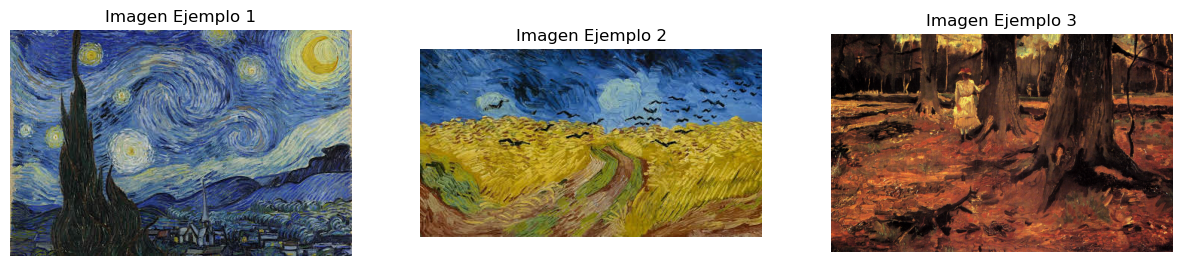

In [7]:
example_2 = imread("wheatfield_with_crows.jpg")
example_3 = imread("girl_in_a_wood.jpg")
images = [example_1, example_2, example_3]

plt.figure(figsize=(15,8))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i])
    plt.title("Imagen Ejemplo " + str(i+1))
    plt.axis("Off")

# Se obtienen los histogramas concatenados de las imágenes 2 y 3
con_hist_2 = concatenated_histogram(example_2, n)
con_hist_3 = concatenated_histogram(example_3, n)

print("El Kernel de intersección entre las imágenes 1 y 2 es:")
inter_1_2=intersection_kernel(con_hist_1, con_hist_2)
print(inter_1_2)
print("El Kernel de intersección entre las imágenes 1 y 3 es:")
inter_1_3=intersection_kernel(con_hist_1, con_hist_3)
print(inter_1_3)
                              
assert inter_1_2>inter_1_3, 'El color de la imagen 2 es más parecido a la imagen original que la imagen 3'
assert inter_1_2<=1 and inter_1_3<=1,'El kernel de intersección debe ser menor o igual a 1'
assert np.isclose(inter_1_2,0.71,0.01), 'El kernel de intersección debe ser aproximadamente 0.7 entre la imagen 1 y la 2'
assert intersection_kernel(con_hist_1, con_hist_1)==1, 'El kernel de intersección debe ser 1 si los histogramas son iguales'

### Ejercicio 2:
Ya hemos implementado la función que calcula la distancia del kernel de intersección, ahora crearemos una función que calcule la distancia Chi cuadrado entre 2 histogramas, recordemos que la formula es la siguiente:

\begin{equation}
    I(x, y) = \frac{1}{2}\sum_{i=1}^{m} \frac{(x_i-y_i)^2}{(x_i+y_i)}
\end{equation}

In [8]:
def Chiqua_dist(x, y):
    'x (ndarray): Histograma de la primera imagen'
    'y (ndarray): Histograma de la segunda imagen'
    # YOUR CODE HERE
    resultado = (1/2)*np.sum( (x-y)**2 / (x+y))
    return resultado

El Kernel de intersección entre las imágenes 1 y 2 es:
0.11204912728919389
El Kernel de intersección entre las imágenes 1 y 3 es:
0.2890037153350067


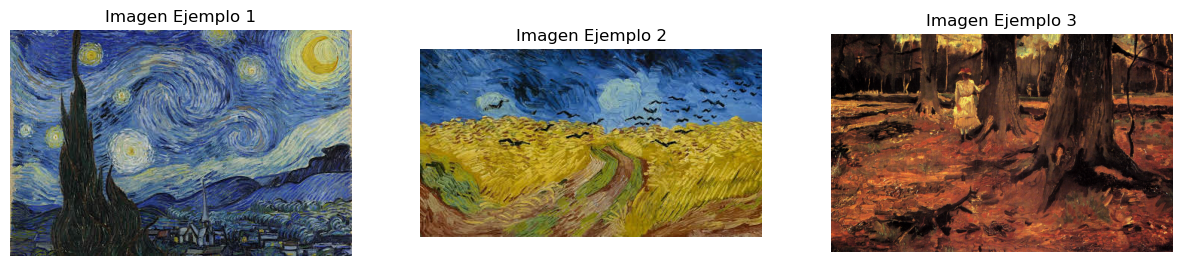

In [9]:
example_2 = imread("wheatfield_with_crows.jpg")
example_3 = imread("girl_in_a_wood.jpg")
images = [example_1, example_2, example_3]

plt.figure(figsize=(15,8))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i])
    plt.title("Imagen Ejemplo " + str(i+1))
    plt.axis("Off")

# Se obtienen los histogramas concatenados de las imágenes 2 y 3
con_hist_2 = concatenated_histogram(example_2, n)
con_hist_3 = concatenated_histogram(example_3, n)

print("El Kernel de intersección entre las imágenes 1 y 2 es:")
inter_1_2=Chiqua_dist(con_hist_1, con_hist_2)
print(inter_1_2)
print("El Kernel de intersección entre las imágenes 1 y 3 es:")
inter_1_3=Chiqua_dist(con_hist_1, con_hist_3)
print(inter_1_3)
                              
assert inter_1_2<inter_1_3, 'El histograma de la imagen 2 se árece más a la de la imagen 3'
assert inter_1_2<=1 and inter_1_3<=1,'La distancia Chi 2 debe ser menor o igual a 1'
assert np.isclose(inter_1_2,0.11,0.1), 'La distancia Chi 2 debe ser aproximadamente 0.7 entre la imagen 1 y la 2'
assert Chiqua_dist(con_hist_1, con_hist_1)==0, 'La distancia Chi 2 debe ser 0 si los histogramas son iguales'

El kernel de intersección entre las imágenes 1 y 2 es mayor que el de las imágenes 2 y 3. Esto nos indica, como era de esperarse, que la distribución de colores entre la 1 y 2 es mayor que entre la 2 y 3. Lo mismo sucede con la distancia Chi 2, donde la distancia entre la imagen 1 y la 2 es menor que entre la 1 y la 3.

Por otro lado, siguiendo la noción de que los histogramas son una forma de representar las imágenes como puntos en un espacio de $N$ dimensiones, podemos pensar que los puntos que se encuentran más cerca en este espacio representan imágenes que tienen distribuciones de color más parecidas. Una vez establecida una definición de distancia en este espacio, entre menor sea la distancia entre los puntos mayor será la similitud entre la distribución de colores de sus imágenes. 



A continuación, calcularemos la distancia euclídea entre los histogramas de las imágenes anteriores para ver si los resultados son congruentes por lo indicado según el kernel de intersección o la distancia Chi 2:

In [10]:
def euclidean_distance(x, y):
    return np.sum((x - y)**2)

print("La distancia euclidea entre los histogramas de las imagenes 1 y 2 es:")
print(euclidean_distance(con_hist_1, con_hist_2))
print("La distancia euclidea entre los histogramas de las imagenes 1 y 3 es:")
print(euclidean_distance(con_hist_1, con_hist_3))

La distancia euclidea entre los histogramas de las imagenes 1 y 2 es:
0.019104560289076103
La distancia euclidea entre los histogramas de las imagenes 1 y 3 es:
0.05248158856183184


Note que efectivamente la distancia euclídea entre los puntos representados por los histogramas 1 y 2 es menor a la de los histogramas 1 y 3. Esto es consistente con el hecho de que las imágenes 1 y 2 tengan una distribución de colores más similar.

## Descriptores de Textura

Uno de los descriptores de imágenes basado en textura más comunes es el histograma de textones, el cual fue estudiado en clase.
El procedimiento para obtener este descriptor se puede resumir en los siguientes pasos:

1. Construir un banco de N filtros de diferentes formas y tamaños.
1. Hacer la cross-correlación de todas las imágenes de entrenamiento con todo el banco de filtros.
1. Representar cada pixel como la respuesta a los N filtros del banco.
1. Hacer k-means con la representación de todos los píxeles de entrenamiento y crear un diccionario de textones con los centroides (textones).
1. Para obtener la representación de textones de una nueva imagen, repetir los pasos 2 y 3 con esta imagen, y luego asignar a cada píxel el textón más cercano su representación. A la imagen resultante se le conoce como **mapa de textones**.
1. Hacer un histograma del mapa de textones para obtener un **histograma de textones**.

El histograma de textones representa a la imagen como un punto en un espacio cuyas dimensiones indican la repetición de la textura asociada a un textón en la imagen.

Teniendo en cuenta que obtener el diccionario de textones resultante de un conjunto de entrenamiento grande es computacionalmente costoso, al igual que calcular el histograma de textones de dichas imágenes, se han formulado otras representaciones de textura menos costosas de obtener. Una de ellas es la representación a partir de patrones locales binarios, o LBP por sus siglas en inglés.

El proceso para obtener un mapa de LBP se puede resumir en los siguientes pasos:
1. Para cada píxel, definir una ventana de píxeles vecinos.
1. Para cada píxel perteneciente a la ventana, asignar un 0 si su intensidad es menor a la del píxel central o un 1 si su intensidad es mayor.
1. Agrupar las representaciones resultantes en clases dependiendo de criterios como invarianza rotacional.
1. El mapa de LBP es el resultado de asignar una clase a cada píxel dependiendo de la agrupación anterior.

El proceso de asignación de clase a cada píxel se puede entender mejor a través del siguiente diagrama:

![lbp-2.png](lbp-2.png)


Para simplificar nuestra implementación solo consideraremos una ventana de 3x3 y 10 clases: una clase por cada uno de los 9 patrones uniformes (aquellos que solo tienen una transición entre 1s y 0s), y una clase para todos los patrones no uniformes:

![clases.png](clases.png)

### Ejercicio 3:
Cree una función que clasifique la ventana con una clase segun la notación anterior. Se le proporciona la función is_uniform, que retorna un False si la ventana no tiene una distribución binaria uniforme y un True de lo contrario. Siga los siguientes pasos:

>- Dada una ventana, binarice los pixeles de al rededor teniendo en cuenta el pixel central. Considere la ventana 3x3.
>- Vuelva la matriz binaria un vector, recorriendo los pixeles en sentido horario.
>- Analice el vector con la función is_uniform. Si esta función le retorna un False, la clase de la ventana es 9, de lo contrario, asigne a la ventana la clase como se indica anteriormente.

La función debe retornar la ventana binarizada, el vector flatenizado en sentido horario y la clase.

In [ ]:
# Esta es una función auxiliar que nos permite saber si el vector binario asociado a una ventana es uniforme o no.
# Lo que hace es que identifica en qué posiciones se da un salto y las marca con 1 (dif_vec). Si hay menos de 3
# saltos el vector está asociado a una ventana uniforme.

def is_uniform(vec):
    dif_vec = np.abs(np.diff(vec))
    return np.sum(dif_vec) < 3

# Esta función recibe una ventana y retorna su clase bajo el modelo de LBP planteado.

def window_to_lbp_class(window):
    'window (ndarray): Arreglo con los pixeles a analizar'
    # YOUR CODE HERE
    window_bin = np.zeros_like(window)
    centro = window[1][1]
    for i in range(window.shape[0]):
        for j in range(window.shape[1]):
            if window[i][j] > centro:
                window_bin[i][j] = 1
            
    return window_bin,vec,cls

In [ ]:
# Visualización del ejemplo con la misma ventana del diagrama inicial

ej_window = np.array([[10, 9,  4 ],
                      [13, 40, 69],
                      [8,  54, 42]])

bin_window = np.array([[0, 0,  0 ],
                      [0, 0, 1],
                      [0,  1, 1]])

flaten_bin=np.array([0,0,0,1,1,1,0,0])

print(f'Venatana de ejemplo:')
print(ej_window)

print(f'Venatana binarizada:')
print(bin_window)

print(f'Venatana binarizada como vector en sentido horario:')
print(flaten_bin)

print('Clase: 3')

window_bin,vec,cls=window_to_lbp_class(ej_window)

print(f'Venatana binarizada implementada:')
print(window_bin)

print(f'Venatana binarizada como vector en sentido horario implementada:')
print(vec)

print(f'Clase: {cls}')

assert np.sum(window_bin-bin_window)==0, 'Se calculó mal la matriz binaria'
assert np.sum(flaten_bin-vec)==0, 'Se calculó mal el vector flatenizado en sentido horario'
assert cls==3, 'La clase debe ser igual a la cantidad de 1s en el vector'

Note que una ventaja de este método es que para obtener las clases no fue necesario entrenar un modelo de clasificación no supervisada como k-means, reduciendo en gran medida el costo computacional. A continuación, utilizaremos esta función para obtener el mapa de LBP de algunas imágenes de textura aparentemente distinta:

In [ ]:
# ESTE FRAGMENTO DE CÓDIGO PUEDE DEMORARSE UN POCO EN CORRER
from tqdm import tqdm
# Función que retorna el mapa de LBP de una imagen
def LBP_map(image):
    # Matriz en la que se va a almacenar el mapa de LBP. Se excluyen los bordes de la imagen
    LBP_map = np.zeros((image.shape[0] -1, image.shape[1] -1))
    for i in tqdm(range(1, image.shape[0] -1)):
        for j in range(1, image.shape[1] -1):
            # Para cada pixel que no pertenece al borde, se extrae la ventana de 3x3 centrada en él
            window = image[i-1:i+2, j-1:j+2]
            # Se obtiene la clase asociada a dicha ventana según el método de LBP
            _,_,cls = window_to_lbp_class(window)
            # Se asigna la clase al mapa de LBP
            LBP_map[i-1, j-1] = cls
    return LBP_map

from skimage.transform import resize

texture_1 = resize(imread("texture_1.jpg", as_gray=True), (400, 600))
texture_2 = resize(imread("texture_2.jpg", as_gray=True), (400, 600))
texture_3 = resize(imread("texture_3.jpg", as_gray=True), (400, 600))
images = [texture_1, texture_2, texture_3]

plt.figure(figsize=(15,8))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.title("Textura " + str(i+1))
    plt.imshow(images[i], cmap='gray')
    plt.axis("Off")
    
LBP_maps = [LBP_map(img) for img in images]

plt.figure(figsize=(15,8))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.title("Mapa LBP " + str(i+1))
    plt.imshow(LBP_maps[i])
    plt.axis("Off")
plt.show()


Note que la distribución de intensidades entre los mapas de LBP es significativamente distinta entre las 3 texturas. Podemos construir un histograma asociado a cada uno de estos mapas:

In [ ]:
# Función que retorna los histogramas de LBP a partir de los mapas
def LBP_histogram(LBP_map):
    hist, _ = np.histogram(LBP_map.flatten(), bins = 10, density=True)
    return hist

# Lista de los 3 histogramas
LBP_histograms = [LBP_histogram(mp) for mp in LBP_maps]

# Visualización
plt.figure(figsize=(15,5))
for i in range(3):
    plt.subplot(1, 3, 1 + i)
    plt.title("Histograma de LBP " + str(i + 1))
    plt.xlabel("Clases")
    plt.ylabel("Frecuencia Normalizada")
    plt.xticks(range(10))
    plt.bar(range(10) , LBP_histograms[i])
plt.tight_layout()
plt.show()

En este tutorial se estudiaron herramientas para representar imágenes como puntos en un espacio de alta dimensionalidad. Al combinar estas dos herramientas, se puede obtener una línea de base para un algoritmo de clasificación supervisada de imágenes basada en su contenido de color o textura.

## Créditos
### Realizado por:
Danniel Moreno
### Supervisado por:
Felipe Escallón Páez - Jose Miguel Abril Nova

2022